# **Loan Application Status Prediction**

### **Problem stmt: **

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

## **1. Dataset loading**

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings('ignore')

In [189]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [158]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## **2.Checking basic details**

### Removing irrelavent columns

In [190]:
df.drop(['Loan_ID'],axis=1,inplace=True) 

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [161]:
df.shape

(614, 12)

In [162]:
print(df.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


**Replacing null values with mean and mode values**

In [191]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode())

In [164]:
#Filling Null Values
df['Dependents'].fillna(value=df['Dependents'].mode()[0],inplace=True)
df['Gender'].fillna(value=df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(value=df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(value=df['Self_Employed'].mode()[0],inplace=True)


In [165]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## **3.EDA**

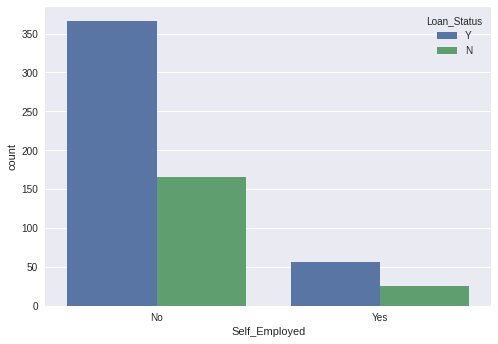

In [172]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

most of the data we have from not employed person
Here we see if the person is not self employed there is high chances of approval

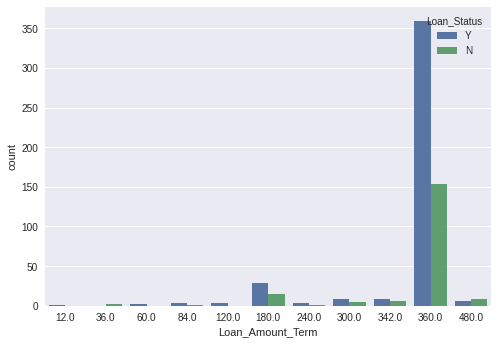

In [171]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved
People those are taking loan for 480 months, most of them are getting approval

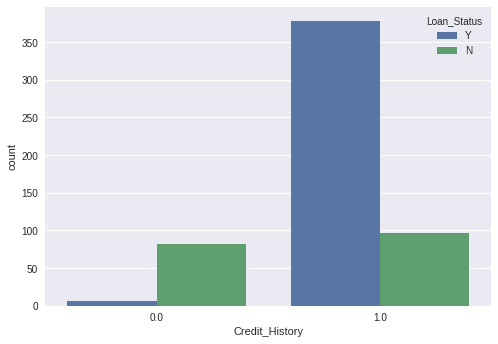

In [192]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

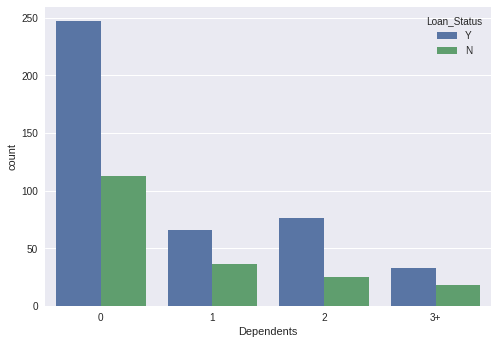

In [173]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

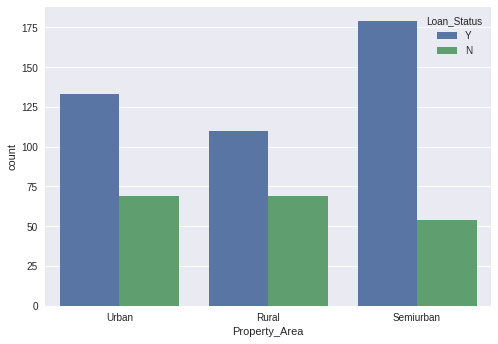

In [169]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

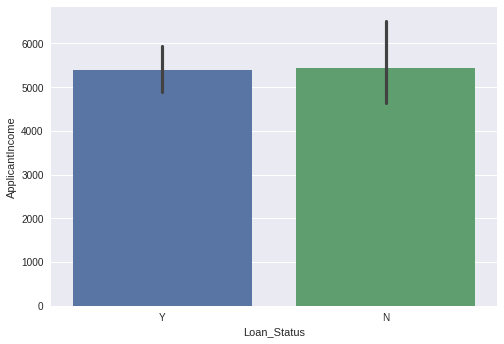

In [167]:
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)

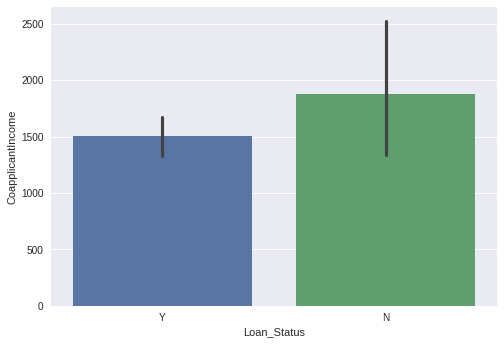

In [168]:
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)

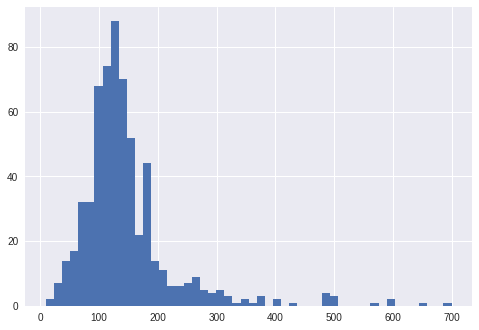

In [181]:
df['LoanAmount'].hist(bins=50)

In [185]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,-0.045364,0.000525,0.005853,-0.172693,0.030239,-0.031319,0.031121,0.082045,0.017987
Married,-0.364569,1.000000,0.334216,0.012304,0.004489,-0.003163,0.233224,0.003281,0.028283,0.031057,0.003071,-0.091478
Dependents,-0.172914,0.334216,1.000000,0.055752,0.056798,0.079403,-0.007295,0.053924,0.056024,0.000862,0.001781,-0.010118
Education,-0.045364,0.012304,0.055752,1.000000,-0.010383,0.073543,0.084689,-0.072995,0.078645,0.069148,-0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,-0.010383,1.000000,0.005906,-0.080509,-0.008925,0.008366,0.005927,0.021996,0.003700
ApplicantIncome,0.005853,-0.003163,0.079403,0.073543,0.005906,1.000000,0.378095,0.365594,-0.013189,0.036718,0.078590,-0.018675
CoapplicantIncome,-0.172693,0.233224,-0.007295,0.084689,-0.080509,0.378095,1.000000,0.203701,0.060137,0.051218,0.018346,-0.084419
LoanAmount,0.030239,0.003281,0.053924,-0.072995,-0.008925,0.365594,0.203701,1.000000,0.020456,0.045040,0.114591,0.040160
Loan_Amount_Term,-0.031319,0.028283,0.056024,0.078645,0.008366,-0.013189,0.060137,0.020456,1.000000,0.075963,-0.066941,0.085191
Credit_History,0.031121,0.031057,0.000862,0.069148,0.005927,0.036718,0.051218,0.045040,0.075963,1.000000,-0.058622,0.280181


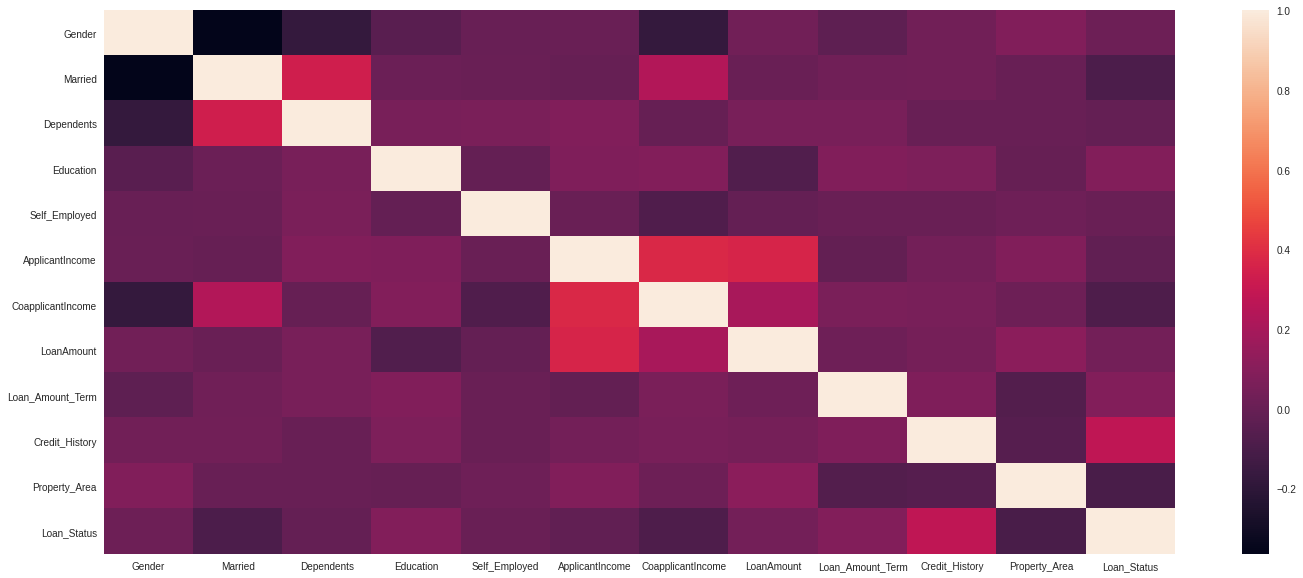

In [186]:
plt.figure(figsize=[24,10])
sns.heatmap(df_corr)

## **4. Data pre-processing**

In [14]:
print(df.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**Encoding**

In [175]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])
df['Gender']=LE.fit_transform(df['Gender'])
df['Married']=LE.fit_transform(df['Married'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['Self_Employed']=LE.fit_transform(df['Self_Employed'])
df['Property_Area']=LE.fit_transform(df['Property_Area'])
df['Loan_Status']=LE.fit_transform(df['Loan_Status'])

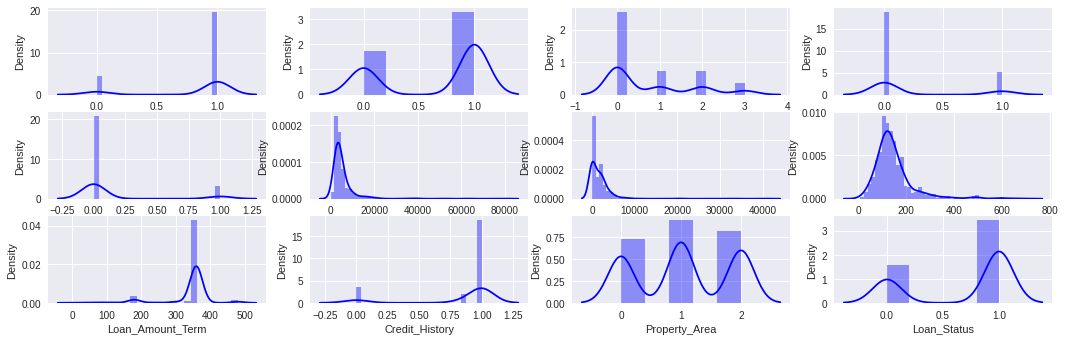

In [178]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

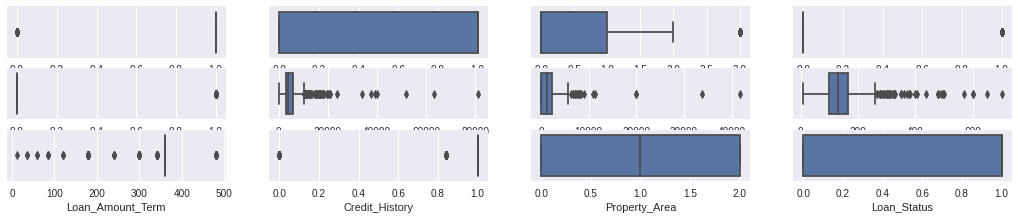

In [179]:
plt.figure(figsize=(18,10))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

**skewness and outlier removal**

In [16]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [17]:
from scipy import stats
import numpy as np
print("Old Shape: ", df.shape)   
z = np.abs(stats.zscore(df))
print(z)

Old Shape:  (614, 12)
[[0.47234264 1.37208932 0.73780632 ... 0.45164045 1.22329839 0.67451931]
 [0.47234264 0.72881553 0.25346957 ... 0.45164045 1.31851281 1.48253724]
 [0.47234264 0.72881553 0.73780632 ... 0.45164045 1.22329839 0.67451931]
 ...
 [0.47234264 0.72881553 0.25346957 ... 0.45164045 1.22329839 0.67451931]
 [0.47234264 0.72881553 1.24474546 ... 0.45164045 1.22329839 0.67451931]
 [2.11710719 1.37208932 0.73780632 ... 2.41044061 0.04760721 1.48253724]]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604]), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7]))


In [19]:
after_zscore = df[(z < 3).all(axis=1)]

In [20]:
after_zscore.shape

(577, 12)

In [21]:
df.shape

(614, 12)

In [22]:
df=after_zscore

In [23]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [24]:
df1 = np.sqrt(df)

df1.head(15)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,76.478755,0.000000,12.100089,18.973666,1.000000,1.414214,1.0
1,1.0,1.0,1.000000,0.0,0.0,67.697858,38.832976,11.313708,18.973666,1.000000,0.000000,0.0
2,1.0,1.0,0.000000,0.0,1.0,54.772256,0.000000,8.124038,18.973666,1.000000,1.414214,1.0
3,1.0,1.0,0.000000,1.0,0.0,50.823223,48.559242,10.954451,18.973666,1.000000,1.414214,1.0
4,1.0,0.0,0.000000,0.0,0.0,77.459667,0.000000,11.874342,18.973666,1.000000,1.414214,1.0
5,1.0,1.0,1.414214,0.0,1.0,73.600272,64.776539,16.340135,18.973666,1.000000,1.414214,1.0
6,1.0,1.0,0.000000,1.0,0.0,48.301139,38.935845,9.746794,18.973666,1.000000,1.414214,1.0
7,1.0,1.0,1.732051,0.0,0.0,55.099909,50.039984,12.569805,18.973666,0.000000,1.000000,0.0
8,1.0,1.0,1.414214,0.0,0.0,63.292970,39.064050,12.961481,18.973666,1.000000,1.414214,1.0
10,1.0,1.0,1.414214,0.0,0.0,56.568542,26.457513,8.366600,18.973666,1.000000,1.414214,1.0


In [25]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.610338
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.320372
Loan_Amount_Term    -2.456414
Credit_History      -1.960638
Property_Area       -0.598165
Loan_Status         -0.822635
dtype: float64

In [26]:
df=df1

## **5.Feature Engineering**

In [27]:
y = df['Loan_Status']
x = df.drop('Loan_Status', axis = 1)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

### **Treating data imbalence**

In [78]:
print(df['Loan_Status'].value_counts())

1.0    398
0.0    179
Name: Loan_Status, dtype: int64


In [79]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.Loan_Status==0]
label1=X[X.Loan_Status==1]
label_unsampled=resample(label0,replace=True,n_samples=len(label1),random_state=27)
unsampled=pd.concat([label1,label_unsampled])
unsampled.Loan_Status.value_counts()

0.0    325
1.0    325
Name: Loan_Status, dtype: int64

In [80]:
x_train= unsampled.drop(columns='Loan_Status')
y_train= unsampled['Loan_Status']

## **scaling**

In [81]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [82]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [83]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000
mean,0.823077,0.667692,0.302322,0.243077,0.156923,0.435810,0.299996,0.520306,0.586315,0.737906,0.574900
std,0.381897,0.471403,0.377713,0.429272,0.364008,0.153077,0.281188,0.144931,0.208417,0.433050,0.416658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.330779,0.000000,0.439380,0.654373,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.399818,0.388146,0.513371,0.654373,1.000000,0.707107
75%,1.000000,1.000000,0.577350,0.000000,0.000000,0.516261,0.518397,0.595135,0.654373,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **6.Model construction**

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**RandomForestClassifier**

In [110]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

              precision    recall  f1-score   support

         0.0       0.79      0.53      0.64        43
         1.0       0.77      0.92      0.84        73

    accuracy                           0.78       116
   macro avg       0.78      0.73      0.74       116
weighted avg       0.78      0.78      0.76       116



In [111]:
randomforest_accu

0.7758620689655172

In [116]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv = 5).mean()
randomforest_cv

0.9107692307692308

**SVC**

In [88]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7758620689655172
[[20 23]
 [ 3 70]]
              precision    recall  f1-score   support

         0.0       0.87      0.47      0.61        43
         1.0       0.75      0.96      0.84        73

    accuracy                           0.78       116
   macro avg       0.81      0.71      0.72       116
weighted avg       0.80      0.78      0.76       116



In [89]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 10).mean()
svc_cv

0.6897761645493043

**DecisionTreeClassifier**

In [90]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.7586206896551724


,precision,recall,f1-score,support
0.0,0.692308,0.627907,0.658537,43.000000
1.0,0.792208,0.835616,0.813333,73.000000
accuracy,0.758621,0.758621,0.758621,0.758621
macro avg,0.742258,0.731762,0.735935,116.000000
weighted avg,0.755176,0.758621,0.755952,116.000000


In [104]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv =13).mean()
dtc_cv

0.7331390831390832

**GaussianNB**

In [105]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7931034482758621


,precision,recall,f1-score,support
0.0,0.913043,0.488372,0.636364,43.000000
1.0,0.763441,0.972603,0.855422,73.000000
accuracy,0.793103,0.793103,0.793103,0.793103
macro avg,0.838242,0.730487,0.745893,116.000000
weighted avg,0.818897,0.793103,0.774219,116.000000


In [106]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.814670296430732

**KNeighborsClassifier**

In [94]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7413793103448276


,precision,recall,f1-score,support
0.0,0.651163,0.651163,0.651163,43.000000
1.0,0.794521,0.794521,0.794521,73.000000
accuracy,0.741379,0.741379,0.741379,0.741379
macro avg,0.722842,0.722842,0.722842,116.000000
weighted avg,0.741379,0.741379,0.741379,116.000000


In [95]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.6516938898971567

**LogisticRegression**

In [96]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression(solver='lbfgs', max_iter=400,random_state=42)

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.7758620689655172
[[22 21]
 [ 5 68]]


,precision,recall,f1-score,support
0.0,0.814815,0.511628,0.628571,43.000000
1.0,0.764045,0.931507,0.839506,73.000000
accuracy,0.775862,0.775862,0.775862,0.775862
macro avg,0.789430,0.721567,0.734039,116.000000
weighted avg,0.782865,0.775862,0.761315,116.000000


In [97]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 3).mean()
logisticregression_cv

0.8128328295912493

In [107]:
print("model                    ","accuracy           ","cv          ","difference")
print("-------------------------------------------------------------------------------------")
print("random forest            ", round(randomforest_accu,2),"            ",round(randomforest_cv,2 ),"               ",round(randomforest_accu-randomforest_cv,2 ))
print("logisticregression       ",round(logisticregression_acc,2),"            ",round(logisticregression_cv,2),"               ",round(logisticregression_acc-logisticregression_cv,2 ))
print("SVC                      ",round(svc_acc,2),"            ",round(svc_cv,2),"               ",round(svc_acc-svc_cv,2 ))
print("gaussian naive bayes     ",round(gnb_acc,2),"           ",round(gnb_cv,2),"               ",round(gnb_acc-gnb_cv,2 ))
print("decission tree classifier",round(dtc_acc,2),"            ",round(dtc_cv,2),"               ",round(dtc_acc-dtc_cv,2 ))
print("KNN                      ",round(knn_acc,2),"            ",round(knn_cv,2),"               ",round(knn_acc-knn_cv,2 ))

model                     accuracy            cv           difference
-------------------------------------------------------------------------------------
random forest             0.76              0.9                 -0.14
logisticregression        0.78              0.81                 -0.04
SVC                       0.78              0.69                 0.09
gaussian naive bayes      0.79             0.81                 -0.02
decission tree classifier 0.76              0.73                 0.03
KNN                       0.74              0.65                 0.09


### **The best model for this problem is gaussian naive bayes which gives least diff btween accuracy score and cv score.**

## **7.Hyper parameter Tuning**

**finding best random state**

In [128]:
#FINDING BEST RANDOM STATE

from sklearn.metrics import r2_score
d=5
for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
  DTC.fit(x_train,y_train)
  pred_train=DTC.predict(x_train)
  pred_test = DTC.predict(x_test)
  a=r2_score(y_train,pred_train)
  b=r2_score(y_test,pred_test)
  c=a-b
  print(i,c)
  if d>=c:
    d=c
    print("least value",i,d)

0 1.3519813519813517
least value 0 1.3519813519813517
1 1.5246440306681268
2 1.5263157894736843
3 1.3291666666666662
least value 3 1.3291666666666662
4 1.1570141570141568
least value 4 1.1570141570141568
5 1.3697705802968965
6 1.1585518102372032
7 0.933075933075933
least value 7 0.933075933075933
8 0.9808130081300812
9 1.3730272596843618
10 1.3206831119544589
11 1.244949494949495
12 1.0137328339575526
13 1.4097222222222219
14 1.4926470588235299
15 1.2083333333333335
16 1.478177763618987
17 1.5407969639468686
18 1.2689832689832687
19 1.3133533133533133
20 1.2888888888888883
21 1.3911816578483243
22 1.3093474426807756
23 1.3957723577235772
24 1.539454806312769
25 1.4184782608695652
26 1.2360972360972362
27 1.3697705802968965
28 1.391181657848324
29 1.251927227875424
30 1.2888888888888885
31 1.1974691974691973
32 1.3306342780026992
33 1.5172413793103448
34 1.3149509803921573
35 1.530555555555555
36 1.3694444444444442
37 1.545121545121545
38 1.4399415845198975
39 0.7365079365079363
least v

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=39)

In [125]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [126]:
gs_NB.best_params_

{'var_smoothing': 1e-05}

In [127]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing = 1e-05)

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.8879310344827587


,precision,recall,f1-score,support
0.0,1.000000,0.628571,0.771930,35.000000
1.0,0.861702,1.000000,0.925714,81.000000
accuracy,0.887931,0.887931,0.887931,0.887931
macro avg,0.930851,0.814286,0.848822,116.000000
weighted avg,0.903430,0.887931,0.879314,116.000000


In [129]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 5).mean()
gnb_cv

0.8146026986506746

### **The best model is Gaussian NB with 88% accuracy**

## **8.Evaluation metrics**

In [135]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [141]:
print("------------------------------------------")
print("GaussianNB")
print("-----------------------------------------")
# accuracy: (tp + tn) / (p + n)
accuracy_gnb = gnb_acc
print('Accuracy: %f' % accuracy_gnb)
# precision tp / (tp + fp)
precision_gnb = precision_score(y_test, predGNB)
print('Precision: %f' % precision_gnb)
# recall: tp / (tp + fn)
recall_gnb = recall_score(y_test, predGNB)
print('Recall: %f' % recall_gnb)
# f1: 2 tp / (2 tp + fp + fn)
f1_gnb = f1_score(y_test, predGNB)
print('F1 score: %f' % f1_gnb)

------------------------------------------
GaussianNB
-----------------------------------------
Accuracy: 0.887931
Precision: 0.691489
Recall: 0.802469
F1 score: 0.742857


### **roc_auc_score**

In [150]:
# train models
model1 = GaussianNB()

# fit model
model1.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)

In [151]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [152]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

print(auc_score1)

0.7202821869488536


## **9.Model saving**

In [142]:
import joblib
joblib.dump(GNB,"final model.pkl")

['final model.pkl']